(1000, 28, 28)
(1000, 1)
(1000, 28, 28)
(1000, 1)
The class label of the first example: [4]


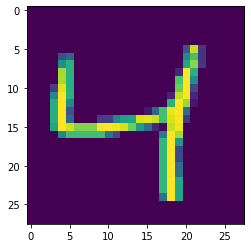

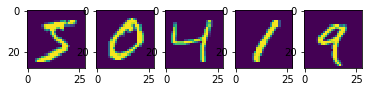

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
q1_digits = np.load('/content/q1_digits.npz')
digits_train = q1_digits['digits_train']
labels_train = q1_digits['labels_train']
digits_test = q1_digits['digits_test']
labels_test = q1_digits['labels_test']
print(digits_train.shape) #1000, 28, 28
print(labels_train.shape) #1000, 1

print(digits_test.shape) #1000, 28, 28
print(labels_test.shape) #1000, 1

# Display an image of a digit
plt.figure()
plt.imshow(digits_train[2,:,:]) # first example in the training dataset
plt.savefig('digit.png')

# Print the class of the first example
print('The class label of the first example:', labels_train[2])

# Plot multiple images (1 by 3)
fig, ax = plt.subplots(nrows=1, ncols=5)
ax[0].imshow(digits_train[0,:,:])
ax[1].imshow(digits_train[1,:,:])
ax[2].imshow(digits_train[2,:,:])
ax[3].imshow(digits_train[3,:,:])
ax[4].imshow(digits_train[4,:,:])


plt.savefig('many_digit.png')

##(a)

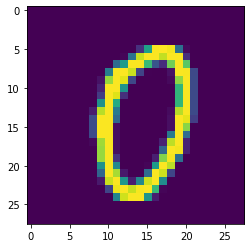

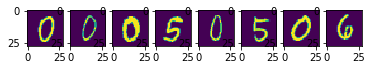

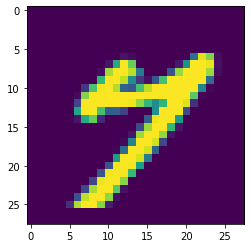

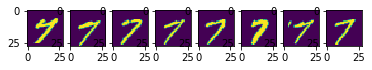

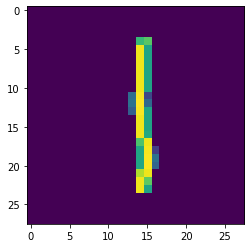

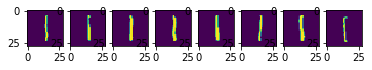

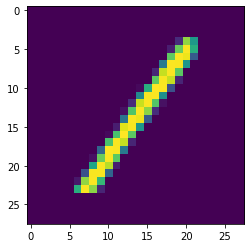

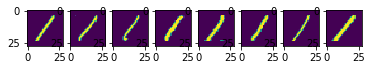

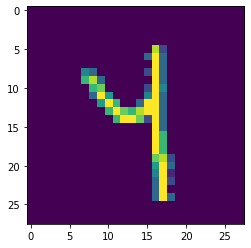

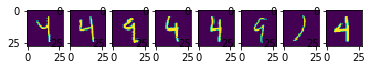

In [10]:
def DIS(i1, i2):
    return np.sqrt(np.sum((i1-i2)**2))
dis = np.zeros(1000)
index = np.zeros((5,1000))
out = np.zeros((5,8))
for i in range(5):   #First five pics
  for j in range(digits_train.shape[0]):
    dis[j] = DIS(digits_test[i], digits_test[j])
    index[i,:] = np.argsort(dis) #Index of nearest distance from 1 ~ 1000

for i in range(5):
  j = 0
  plt.figure()
  plt.imshow(digits_test[int(index[i,j]),:,:])
  fig, ax = plt.subplots(nrows=1, ncols=8)
  for j in range(8):
    ax[j].imshow(digits_test[int(index[i,j]),:,:])
    # plt.imshow(digits_train[int(index[i,j]),:,:])
    # plt.savefig('many_digit.png')

# for i in range(5):
#   for j in range(8):
#     plt.figure()
#     plt.imshow(digits_test[int(index[i,j]),:,:])



##(b) 
When k = 10, accuracy = 0.857

In [0]:
def knn_search(k):
  
  dis = np.zeros(1000)
  index = np.zeros((1000,1000))
  out = np.zeros((1000,k))
  vote = np.zeros(1000)

  for i in range(1000):
    for j in range(digits_train.shape[0]):
      dis[j] = DIS(digits_test[i], digits_test[j])
      index[i,:] = np.argsort(dis) #Index of nearest distance from 1 ~ 1000
  for i in range(1000):
    for j in range(k):
      if labels_test[int(index[i,j])]  == labels_test[i]:
        vote[i] += 1

  # print(vote)
  return sum(vote) / k / 1000


##(c)
When having over 100,000 training examples, the computing time would be too much. This is one of the disadvantages of kNN search. As the number k is getting higher, the accuracy would then decrease.

In [0]:
for i in range(2,20,4):
  rate = knn_search(i)
  print("rate", i, "=  ", rate)


rate 2 =   0.948
rate 6 =   0.8541666666666666
rate 10 =   0.8027000000000001
rate 14 =   0.7600714285714285
rate 18 =   0.7247777777777779
